# Chocolate Scraping with Beautiful Soup

This is a project about how to scrape data from a given website. This project will use pyplot, numpy, pandas, request and BeautifulSoup libraries.
The website has over 1700 reviews of chocolate bars from all around the world and was provided by Codecademy: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html


## Scope
1) Scrape data from the given website and make a Dataframe.

2) Make a histogram of ratings. What seems to be the rating that occurs the most? 

3) What are the best 10 companies of the Dataset based on his ratings?

4) What is the relationship between the percentage of cacao used vs Ratings?

5) Where are the best cocoa beans grown?

6) Which countries produce the highest-rated bars?

### Importing necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

## 1) Scrape data from the given website and make a Dataframe.

#### Making a request to the website and creating a BeautifulSoup Object

In [2]:
url = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")
soup = BeautifulSoup(url.content, "html.parser")
#print(soup)

#### Making lists of data and creating a global Dataframe.

In [3]:
#Company Column
company_names_tags = soup.find_all(attrs={"class": "Company"})
company = []
for name in company_names_tags[1:]:
    company.append(name.get_text())
    
#Origin Column
origin_names_tags = soup.find_all(attrs={"class": "Origin"})
origins = []
for country in origin_names_tags[1:]:
    origins.append(country.get_text())

#REF Column
ref_tags = soup.find_all(attrs={"class": "REF"})
refs = []
for i in ref_tags[1:]:
    refs.append(int(i.get_text()))
    
#ReviewDate Column
review_date_tags = soup.find_all(attrs={"class": "ReviewDate"})
review_years = []
for year in review_date_tags[1:]:
    review_years.append(int(year.get_text()))

#CocoaPercent Column
cocoa_percent = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_percent_float = []
for percent in cocoa_percent[1:]:
    x = percent.get_text()
    x = x.strip("%") #This line of code strip the % symbol
    cocoa_percent_float.append(float(x))

#CompanyLocation Column
company_locations_tags = soup.find_all(attrs={"class": "CompanyLocation"})
locations = []
for location in company_locations_tags[1:]:
    locations.append(location.get_text())
    
#Rating Column
ratings_tags = soup.find_all(attrs={"class": "Rating"})
ratings = []
for rating in ratings_tags[1:]:
    ratings.append(float(rating.get_text()))

#BeanType Column
bean_type_tags = soup.find_all(attrs={"class": "BeanType"})
bean_types = []
for types in bean_type_tags[1:]:
    bean_types.append(types.get_text())

#BroadBeanOrigin Column
bean_origin_tag = soup.find_all(attrs={"class": "BroadBeanOrigin"})
bean_origins = []
for country in bean_origin_tag[1:]:
    bean_origins.append(country.get_text())

chocolate_df = pd.DataFrame.from_dict(
    {"Company": company, 
     "Origin": origins, 
     "REF": refs,
     "ReviewDate": review_years,
     "CocoaPercent": cocoa_percent_float,
     "CompanyLocation": locations,
     "Rating": ratings,
     "BeanType": bean_types,
     "BroadBeanOrigin": bean_origins
    })

#print(chocolate_df.info(), chocolate_df.head())

## 2) Make a histogram of ratings. What seems to be the rating that occurs the most? 

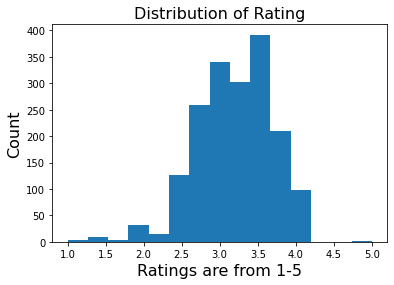

In [4]:
plt.hist(chocolate_df.Rating.values, range=(1,5), bins=15)
plt.title("Distribution of Rating", fontsize = 16)
plt.xlabel("Ratings are from 1-5", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.show()

The ratings that seems to be occurring the most are 3 - 3.75

## 3) What are the best ten companies of the Dataset based on his ratings?

In [10]:
average_rating_by_company = chocolate_df.groupby("Company").Rating.mean()
#print(average_rating_by_company)
best_ten = average_rating_by_company.nlargest(10) #nlargest() Return the first n rows ordered by columns in descending order
best_ten = best_ten.reset_index()
print(best_ten)
#print(type(best_ten))

Company
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Rating, Length: 416, dtype: float64
                                Company    Rating
0                Tobago Estate (Pralus)  4.000000
1  Heirloom Cacao Preservation (Zokoko)  3.875000
2                                Ocelot  3.875000
3                                Amedei  3.846154
4                                Matale  3.812500
5                                Patric  3.791667
6                     Idilio (Felchlin)  3.775000
7                                Acalli  3.750000
8                            Chocola'te  3.750000
9          Christopher Morel (Felchlin)  3.750000


## 4) What is the realtionship between the percentage of cacao used vs Ratings?

### Making a ScatterPlot of Cacao_Percetage vs Ratings

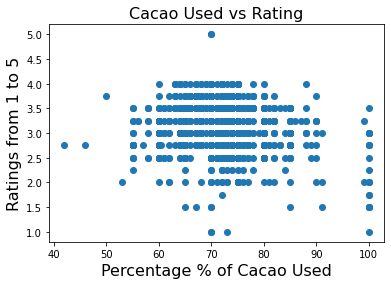

In [6]:
plt.clf()
plt.scatter(chocolate_df.CocoaPercent, chocolate_df.Rating)
plt.title("Cacao Used vs Rating", fontsize = 16)
plt.xlabel("Percentage % of Cacao Used", fontsize = 16)
plt.ylabel("Ratings from 1 to 5", fontsize = 16)
plt.show()

It seems that a high percentage of cocoa used does not guarantee a high rating. Using around 60% - 80% of the cocoa, it gives a rating between 2.5 - 4.0 in most cases.

## 5) Where are the best cocoa beans grown?

In [7]:
#print(chocolate_df.BroadBeanOrigin.unique())
best_cocoa_beans = chocolate_df.groupby("BroadBeanOrigin").Rating.mean()
best_ten_cocoa_beans = best_cocoa_beans.nlargest(10) #nlargest() Return the first n rows ordered by columns in descending order
best_ten_cocoa_beans = best_ten_cocoa_beans.reset_index()
print(best_ten_cocoa_beans)

                BroadBeanOrigin  Rating
0         Dom. Rep., Madagascar    4.00
1   Gre., PNG, Haw., Haiti, Mad    4.00
2  Guat., D.R., Peru, Mad., PNG    4.00
3                Peru, Dom. Rep    4.00
4            Ven, Bolivia, D.R.    4.00
5               Venezuela, Java    4.00
6             DR, Ecuador, Peru    3.75
7          Dominican Rep., Bali    3.75
8             PNG, Vanuatu, Mad    3.75
9                  Peru, Belize    3.75


Surprisingly, the top Ratings comes from a mix of cacao from at least two countries and up to 4 countries!

### From what Specific Origin or Bar name the best cocoa beans comes from?
For this question we can use the Origin column.

In [8]:
#print(chocolate_df.Origin.unique())
best_cocoa_beans_origin = chocolate_df.groupby("Origin").Rating.mean()
best_ten_cocoa_beans_origin = best_cocoa_beans_origin.nlargest(10) #nlargest() Return the first n rows ordered by columns in descending order
best_ten_cocoa_beans_origin = best_ten_cocoa_beans_origin.reset_index()
print(best_ten_cocoa_beans_origin)

                                        Origin    Rating
0                                Toscano Black  4.166667
1                                  ABOCFA Coop  4.000000
2                        Alto Beni, Cru Savage  4.000000
3                                       Asante  4.000000
4     Bali, Sukrama Bros. Farm, Melaya, 62hr C  4.000000
5  Bellavista Coop, #225, LR, MC, CG Exclusive  4.000000
6                                      Cabosse  4.000000
7       Carenero Superior, Urrutia, Barlovento  4.000000
8                          Chuao, #217, DR, MC  4.000000
9                      Claudio Corallo w/ nibs  4.000000


## 6) Which countries produce the highest-rated bars?

In [9]:
best_cocoa_country = chocolate_df.groupby("CompanyLocation").Rating.mean()
best__ten_cocoa_country = best_cocoa_country.nlargest(10) 
best__ten_cocoa_country = best__ten_cocoa_country.reset_index()
print(best__ten_cocoa_country)

  CompanyLocation    Rating
0           Chile  3.750000
1       Amsterdam  3.500000
2     Netherlands  3.500000
3     Philippines  3.500000
4         Iceland  3.416667
5         Vietnam  3.409091
6          Brazil  3.397059
7          Poland  3.375000
8       Australia  3.357143
9       Guatemala  3.350000


The countries that produces the highest-rated bars are Chile, Netherlands and Philippines since those have a rating equal or above 3.5